###### ROC-AUC

###### An AUC of 0.8 means that if you randomly choose one positive instance and one negative instance, your model will rank the positive instance higher than the negative instance 80% of the time.
###### It’s about the model’s ranking ability, not direct classification accuracy.

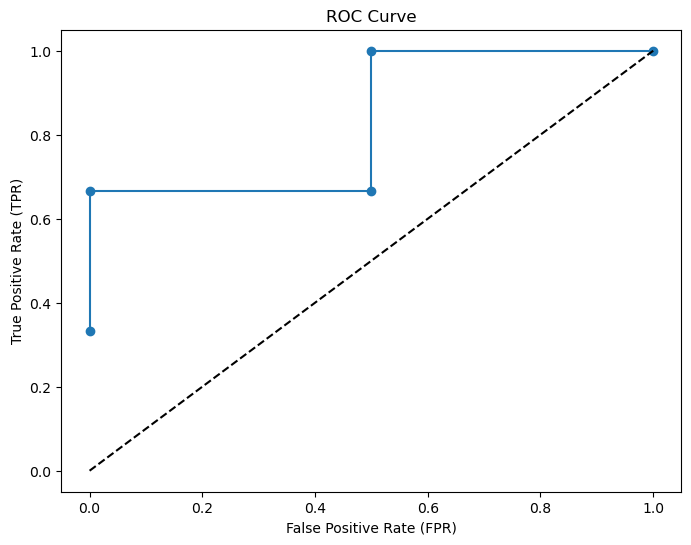

AUC: -0.83
Sklearn AUC: 0.83


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# Sample dataset
y_true = np.array([0, 0, 1, 1, 1])  # True labels
y_scores = np.array([0.1, 0.4, 0.35, 0.8, 0.9])  # Predicted scores

def calculate_tpr_fpr(y_true, y_scores):
    thresholds = np.sort(np.unique(y_scores))
    tpr = []
    fpr = []
    
    for threshold in thresholds:
        y_pred = (y_scores >= threshold).astype(int)
        tp = np.sum((y_true == 1) & (y_pred == 1))
        fp = np.sum((y_true == 0) & (y_pred == 1))
        fn = np.sum((y_true == 1) & (y_pred == 0))
        tn = np.sum((y_true == 0) & (y_pred == 0))
        
        tpr.append(tp / (tp + fn))
        fpr.append(fp / (fp + tn))
    
    return np.array(fpr), np.array(tpr)

# Calculate TPR and FPR
fpr, tpr = calculate_tpr_fpr(y_true, y_scores)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='o')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.show()

# Calculate AUC
auc = np.trapz(tpr, fpr)  # Using the trapezoidal rule to approximate the area under the curve
print(f'AUC: {auc:.2f}')

# Compare with sklearn's AUC function
auc_sklearn = roc_auc_score(y_true, y_scores)
print(f'Sklearn AUC: {auc_sklearn:.2f}')
